In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score,auc

In [2]:
data=pd.read_csv('Titanic_train.csv')

In [3]:
data_test=pd.read_csv('Titanic_test.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
feature_train=data.drop('Survived',axis=1)

In [7]:
feature_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
target_train=data[['Survived']]

In [9]:
target_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [10]:
feature_train.duplicated().sum()

0

In [11]:
LR=LogisticRegression()

In [12]:
lab=LabelEncoder()

In [13]:
feature_train=feature_train.drop('Name',axis=1)

In [14]:
feature_train.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
feature_train.shape


(891, 10)

In [16]:
feature_train=feature_train.drop('Cabin',axis=1)

In [17]:
feature_train['Age']=feature_train['Age'].fillna(feature_train['Age'].mean())

In [19]:
feature_train['Embarked']=feature_train['Embarked'].fillna(feature_train['Embarked'].mode())

In [20]:
feature_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,female,35.0,1,0,113803,53.1000,S
4,5,3,male,35.0,0,0,373450,8.0500,S


In [77]:
data('SibSp').unique

TypeError: 'DataFrame' object is not callable

In [21]:
feature_train['Sex']=lab.fit_transform(feature_train['Sex'])

In [22]:
feature_train=feature_train.drop('Ticket',axis=1)

In [23]:
feature_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,S
1,2,1,0,38.0,1,0,71.2833,C
2,3,3,0,26.0,0,0,7.9250,S
3,4,1,0,35.0,1,0,53.1000,S
4,5,3,1,35.0,0,0,8.0500,S


In [24]:
feature_train['Embarked']=lab.fit_transform(feature_train['Embarked'])

In [25]:
std=StandardScaler()

In [26]:
feature_trains=std.fit_transform(feature_train)

In [27]:
feature=pd.DataFrame(feature_trains)

In [28]:
feature.head()

,0,1,2,3,4,5,6,7
0,-1.730108,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.581114
1,-1.726220,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.938460
2,-1.722332,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.581114
3,-1.718444,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,0.581114
4,-1.714556,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.581114


In [29]:
LR.fit(feature,target_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [30]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
data_test=data_test.drop('Cabin',axis=1)

In [32]:
data_test=data_test.drop('Ticket',axis=1)

In [33]:
data_test['Age']=data_test['Age'].fillna(data_test['Age'].mean())

In [34]:
data_test['Fare']=data_test['Fare'].fillna(data_test['Fare'].mean())

In [35]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [36]:
data_test=data_test.drop('Name',axis=1)

In [37]:
data_test['Embarked']=lab.fit_transform(data_test['Embarked'])

In [38]:
data_test['Sex']=lab.fit_transform(data_test['Sex'])

In [39]:
data_test=std.fit_transform(data_test)

In [40]:
test=pd.DataFrame(data_test)

In [41]:
test.head()

,0,1,2,3,4,5,6,7
0,-1.727912,0.873482,0.755929,0.334993,-0.499470,-0.400248,-0.498407,-0.470915
1,-1.719625,0.873482,-1.322876,1.325530,0.616992,-0.400248,-0.513274,0.700767
2,-1.711337,-0.315819,0.755929,2.514175,-0.499470,-0.400248,-0.465088,-0.470915
3,-1.703050,0.873482,0.755929,-0.259330,-0.499470,-0.400248,-0.483466,0.700767
4,-1.694763,0.873482,-1.322876,-0.655545,0.616992,0.619896,-0.418471,0.700767


In [42]:
ypred=LR.predict(test)

In [43]:
ypred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [44]:
y_pred=LR.predict(feature)

In [45]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [46]:
confusion_matrix=confusion_matrix(target_train,y_pred)
confusion_matrix

array([[474,  75],
       [102, 240]], dtype=int64)

In [47]:
accuracy_score(target_train,y_pred)

0.8013468013468014

Text(0.5, 1.0, 'Confusion Matrix')

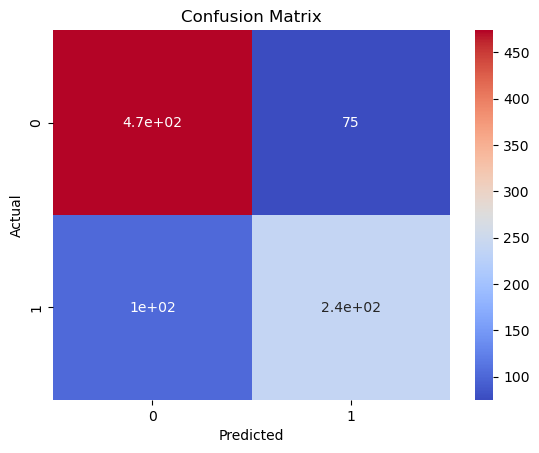

In [48]:
sns.heatmap(confusion_matrix,annot=True,cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [49]:
print(classification_report(target_train,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [50]:
# from the report we can understand that 82% of prediction of ) class is right and 76% of prediction 0f 1 class is right.
# from the report we can understand that 86% of 0 is predicted as 0 and 70% of 1 is predicted as 1
# F1 score provides a balance between precision and recall

In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(feature,target_train,train_size=0.75,random_state=10)

In [52]:
LR.fit(xtrain,ytrain)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [53]:
ypred2=LR.predict(xtest)

In [54]:
ypred2

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [55]:
accuracy_score(ytest,ypred2)

0.8295964125560538

In [62]:
ypred_pro=LR.predict_proba(xtest)[:,1]

In [63]:
ypred_pro

array([0.09387039, 0.14497476, 0.12072261, 0.92182572, 0.87999401,
       0.1459293 , 0.12699614, 0.16149826, 0.10238294, 0.13662803,
       0.27609066, 0.91143402, 0.65269648, 0.47786944, 0.25489509,
       0.24572386, 0.02426838, 0.04308962, 0.5492192 , 0.18079832,
       0.06905266, 0.3308225 , 0.70572129, 0.07891979, 0.28561042,
       0.14106972, 0.140925  , 0.6418073 , 0.14045031, 0.9225341 ,
       0.87399493, 0.24742729, 0.73254334, 0.03460163, 0.79424075,
       0.10873563, 0.68204227, 0.24511912, 0.142984  , 0.10234833,
       0.06790007, 0.14827132, 0.10841545, 0.21982062, 0.2395154 ,
       0.4788416 , 0.13964168, 0.14104487, 0.97171688, 0.25951899,
       0.29049877, 0.12284985, 0.15551638, 0.35730138, 0.29521175,
       0.96002879, 0.0460814 , 0.76222259, 0.94058417, 0.05125359,
       0.15911608, 0.89455029, 0.70628474, 0.54589523, 0.02924558,
       0.14880253, 0.27344513, 0.10568875, 0.09598692, 0.50543122,
       0.33899669, 0.07595818, 0.1246617 , 0.04430142, 0.81874

In [64]:
fpr,tpr,threshold=roc_curve(ytest,ypred_pro)

In [65]:
fpr

array([0.        , 0.        , 0.        , 0.00680272, 0.00680272,
       0.01360544, 0.01360544, 0.02721088, 0.02721088, 0.03401361,
       0.03401361, 0.04761905, 0.04761905, 0.06122449, 0.06122449,
       0.06802721, 0.06802721, 0.08843537, 0.08843537, 0.0952381 ,
       0.0952381 , 0.10204082, 0.10204082, 0.10884354, 0.10884354,
       0.1292517 , 0.1292517 , 0.14285714, 0.14285714, 0.16326531,
       0.16326531, 0.18367347, 0.18367347, 0.20408163, 0.20408163,
       0.21768707, 0.21768707, 0.23129252, 0.23129252, 0.27210884,
       0.27210884, 0.33333333, 0.33333333, 0.3537415 , 0.3537415 ,
       0.61904762, 0.61904762, 0.62585034, 0.62585034, 0.73469388,
       0.73469388, 0.74829932, 0.74829932, 0.78911565, 0.78911565,
       0.97278912, 0.97278912, 1.        ])

In [68]:
roc_auc=auc(fpr,tpr)

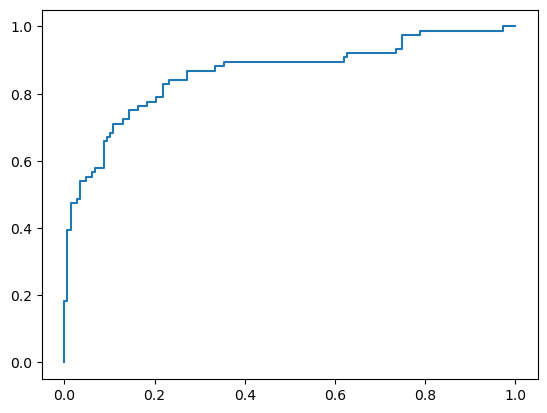

In [69]:
plt.figure()
plt.plot(fpr,tpr)

The plot covers maximum area so it is a good model

## Coeffecient

In [70]:
LR.coef_

array([[-0.01247844, -0.82250473, -1.27471721, -0.40763788, -0.56397731,
        -0.08543344,  0.07605382, -0.23280957]])

## The significant features are Sex, Pclass, Age, Fare 

In [72]:
import pickle

In [83]:
file='model.pkl'

In [84]:
pickle.dump(LR,open(file,'wb'))

In [ ]:
feta

In [78]:
xtrain.head()

,0,1,2,3,4,5,6,7
578,0.517088,0.827377,-1.355574,0.000000,0.432793,-0.473674,-0.357308,-1.938460
323,-0.474322,-0.369365,-1.355574,-0.592481,0.432793,0.767630,-0.064516,0.581114
654,0.812568,0.827377,-1.355574,-0.900298,-0.474545,-0.473674,-0.512513,-0.678673
157,-1.119710,0.827377,0.737695,0.023154,-0.474545,-0.473674,-0.486337,0.581114
692,0.960307,0.827377,0.737695,0.000000,-0.474545,-0.473674,0.489104,0.581114


In [79]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [87]:
feature_train['Embarked'].unique()

array([2, 0, 1, 3])